In [1]:
import numpy 
# 시그모이드 함수를 사용하기 위한 scipy import
import scipy.special
# library for plotting arrays
import matplotlib.pyplot as plt
# 웹 상에서 바로 결과를 보기 위한 코드
%matplotlib inline
import imageio
import glob

In [2]:
# 신경망 네트워크 선언
class neuralNetwork:
    
    
    # 초기화
    def __init__(self, inputnodes, hiddennodes, hiddennodes2, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.hnodes2 = hiddennodes2
        self.onodes = outputnodes
        
        # 정교한 최초 가중치 설정을 위해 0을 기준으로 하고, 들어오는 노드 개수의 루트를 씌운 값의 표준편차를 가진 정규분포를 통해 구할 수 있다.
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.whh = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes2, self.hnodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes2))

        # 학습률
        self.lr = learningrate
        
        # x라는 값을 받아서 scipy.special.explit(x)를 반환한다. (lambda는 인라인 함수 느낌)
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # 네트워크 학습
    def train(self, inputs_list, targets_list):
        # 입력 데이터를 최소 2차원으로 행렬로 변환하는 과정
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        hidden2_inputs = numpy.dot(self.whh, hidden_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)
        
        final_inputs = numpy.dot(self.who, hidden2_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # 오차 역전파 과정
        output_errors = targets - final_outputs
        hidden2_errors = numpy.dot(self.who.T, output_errors) 
        hidden_errors = numpy.dot(self.whh.T, hidden2_errors)
        
        # 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden2_outputs))
        # 가중치 업데이트
        self.whh += self.lr * numpy.dot((hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs)), numpy.transpose(hidden_outputs))
        # 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # 네트워크 질의 부분
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        hidden2_inputs = numpy.dot(self.whh, hidden_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)
        
        final_inputs = numpy.dot(self.who, hidden2_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:

input_nodes = 4
hidden_nodes = 50
hidden2_nodes=10
output_nodes = 3

learning_rate = 0.2

n = neuralNetwork(input_nodes,hidden_nodes,hidden2_nodes,output_nodes, learning_rate)

In [4]:
training_data_file = open("/Users/jungwook/Desktop/Jupyter_venv/iris/iris_train.csv", 'r')
training_data_list = training_data_file.readlines()[1:]
training_data_file.close()

In [5]:
# 네트워크 학습 과정

# epochs is the number of times the training data set is used for training
epochs = 150

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = numpy.asfarray(all_values[1:5])
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[5])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [6]:
# mnist 테스트 데이터인 csv 파일을 리스트로 불러오기
test_data_file = open("/Users/jungwook/Desktop/Jupyter_venv/iris/iris_test.csv", 'r')
test_data_list = test_data_file.readlines()[1:]
test_data_file.close()
test_data_list

['1,5.1,3.5,1.4,0.2,0\n',
 '2,4.9,3,1.4,0.2,0\n',
 '3,4.7,3.2,1.3,0.2,0\n',
 '51,7,3.2,4.7,1.4,1\n',
 '52,6.4,3.2,4.5,1.5,1\n',
 '53,6.9,3.1,4.9,1.5,1\n',
 '101,6.3,3.3,6,2.5,2\n',
 '102,5.8,2.7,5.1,1.9,2\n',
 '103,7.1,3,5.9,2.1,2\n',
 '104,6.3,2.9,5.6,1.8,2\n',
 '12,4.8,3.4,1.6,0.2,0\n',
 '13,4.8,3,1.4,0.1,0\n',
 '14,4.3,3,1.1,0.1,0\n',
 '15,5.8,4,1.2,0.2,0\n',
 '16,5.7,4.4,1.5,0.4,0\n',
 '66,6.7,3.1,4.4,1.4,1\n',
 '67,5.6,3,4.5,1.5,1\n',
 '68,5.8,2.7,4.1,1,1\n',
 '69,6.2,2.2,4.5,1.5,1\n',
 '70,5.6,2.5,3.9,1.1,1\n',
 '116,6.4,3.2,5.3,2.3,2\n',
 '117,6.5,3,5.5,1.8,2\n',
 '118,7.7,3.8,6.7,2.2,2\n',
 '119,7.7,2.6,6.9,2.3,2\n',
 '120,6,2.2,5,1.5,2\n']

In [7]:
# 신경망 테스트하기

# 신경망의 성능의 지표가되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 정답은 첫 번째 값
    correct_label = int(all_values[5])
    # 입력 값의 범위와 값 조정
    inputs = numpy.asfarray(all_values[1:5]) 
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = numpy.argmax(outputs)
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
        print("label is : ", label)
        print("correct label is : ", correct_label)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        print("label is : ", label)
        print("correct label is : ", correct_label)
        pass
    pass

label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  2
correct label is :  1
label is :  2
correct label is :  1
label is :  2
correct label is :  1
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  2
correct label is :  1
label is :  2
correct label is :  1
label is :  2
correct label is :  1
label is :  2
correct label is :  1
label is :  2
correct label is :  1
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2


In [8]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.68


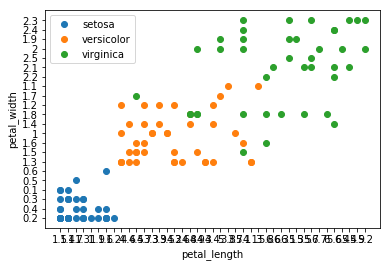

In [9]:
x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]

for row in training_data_list[0:]:
    value = row.split(',')
    if value[5] == "0\n":
        x1.append(value[3])
        y1.append(value[4])
    elif value[5] == "1\n":
        x2.append(value[3])
        y2.append(value[4])
    elif value[5] == "2\n":
        x3.append(value[3])
        y3.append(value[4])
        pass
    value[5]
    pass
plt.plot(x1,y1,'o', label = 'setosa')
plt.plot(x2,y2,'o',label = 'versicolor')
plt.plot(x3,y3,'o',label='virginica')
plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()